In [1]:
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium

#### Question 1

In [2]:
#retreive data from  https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
soup


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YEZojQpAEKcAA0vghjsAAABO","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":1011037969,"wgRevisionId":1011037969,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in Ontario","Postal code

In [3]:
table = soup.find_all('table')[0]                   #store as table
df = pd.read_html(str(table))                       #create df
data = pd.read_json(df[0].to_json(orient='records'))
data.head()


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood


In [4]:
#Choosing only data where field Borough doesn't have not assigned value
raw_data_selected = data[data['Borough'] != 'Not assigned']

Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.



In [5]:
#Grouping Data/drop NA values
raw_data_selected = raw_data_selected.groupby(['Borough','Postal Code'],as_index=False,dropna=True).agg(','.join)
raw_data_selected.head()

,Borough,Postal Code,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.


In [6]:
#Replacing values in Neighbourhood field with Borough where Neighbourhood is not assigned
raw_data_selected['Neighbourhood'] = np.where(raw_data_selected['Neighbourhood'] == 'Not assigned', raw_data_selected['Borough'], raw_data_selected['Neighbourhood'])
raw_data_selected

,Borough,Postal Code,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"
...,...,...,...
98,West Toronto,M6S,"Runnymede, Swansea"
99,York,M6C,Humewood-Cedarvale
100,York,M6E,Caledonia-Fairbanks
101,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"


If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.


In [7]:
#check for null values
raw_data_selected.isnull().sum()

Borough          0
Postal Code      0
Neighbourhood    0
dtype: int64

In [8]:
#check for na values
raw_data_selected.isna().sum()

Borough          0
Postal Code      0
Neighbourhood    0
dtype: int64

Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.


In [9]:
#Shape of Data
raw_data_selected.shape

(103, 3)

In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

#### Question 2

to create the following dataframe with postal code, borough,Neighbourhood,Latititude and longitude

In [10]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
geospatial_data.columns=['Postal Code','Latitude','Longitude']
geospatial_data.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

In [12]:
#Merging dataframes
merged_data = pd.merge(raw_data_selected, geospatial_data, on='Postal Code')
merged_data.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


#### Question 3

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:

to add enough Markdown cells to explain what you decided to do and to report any observations you make. 
to generate maps to visualize your neighborhoods and how they cluster together. 

In [13]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [14]:
merged_data

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,"(43.7153834, -79.4056784)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,"(43.6895743, -79.3831599)"
...,...,...,...,...,...,...
98,West Toronto,M6S,"Runnymede, Swansea",43.651571,-79.484450,"(43.6515706, -79.4844499)"
99,York,M6C,Humewood-Cedarvale,43.693781,-79.428191,"(43.6937813, -79.4281914)"
100,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512,"(43.6890256, -79.453512)"
101,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,"(43.6911158, -79.4760133)"


In [15]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

In [16]:
BBox = ((merged_data['Longitude'].min(), 
         merged_data['Longitude'].max(),
         merged_data['Latitude'].min(), 
         merged_data['Latitude'].max()))

In [17]:
BBox

(-79.615819, -79.1604971, 43.6024137, 43.8361247)

In [18]:
ruh_m = plt.imread("https://github.com/unknown095/IDS-projects/blob/main/map.png?raw=true")

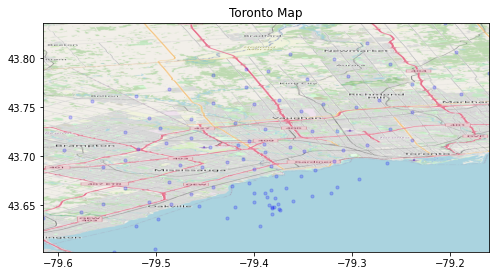

In [19]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(merged_data['Longitude'], merged_data['Latitude'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Toronto Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [20]:

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [21]:
import pandas, os, geopy
from geopy.geocoders import Nominatim

In [22]:
geolocator = Nominatim(user_agent="coursera")
address = 'Toronto'
try:
    location = geolocator.geocode(address)
    latitude = merged_data['Latitude'].astype(float)
    longitude = merged_data['Longitude'].astype(float)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinates of {} are {}, {}.'.format(address, latitude, longitude))
except AttributeError:
    print('Cannot find: {}, will drop index: {}'.format(address, index))

my_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(merged_data['Latitude'],merged_data['Longitude'], merged_data['Postal Code']):
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(my_map)  
    
my_map

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


In [23]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent='coursera')
location = geolocator.geocode(address)
latitude = merged_data['Latitude']
longitude = merged_data['Longitude']
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the City of Toronto are 43.6534817, -79.3839347.


In [24]:
import folium
merged_data.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.7280205 -79.38879009999999)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.7127511 -79.3901975)
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,POINT (43.7153834 -79.4056784)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.7043244 -79.38879009999999)
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,POINT (43.6895743 -79.3831599)


In [26]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[(latitude), (longitude)], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(merged_data['Latitude'], merged_data['Longitude'], merged_data['Borough'], merged_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [27]:
CLIENT_ID = 'PFMCEGVYKJ4VWFKRNXJKHUXUEAEFU0DD1RJUPLNRHSEJXLIX' # your Foursquare ID
CLIENT_SECRET = 'NSEGOTA1QSUTNLI02ZHR5QP4B1SFSB0VC0CQMD0BFSHOIEOG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PFMCEGVYKJ4VWFKRNXJKHUXUEAEFU0DD1RJUPLNRHSEJXLIX
CLIENT_SECRET:NSEGOTA1QSUTNLI02ZHR5QP4B1SFSB0VC0CQMD0BFSHOIEOG


In [28]:
merged_tor=merged_data[merged_data['Borough'].str.contains('Toronto')]
to_data = merged_tor.reset_index(drop=True)
to_data.head()
to_data.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.7280205 -79.38879009999999)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.7127511 -79.3901975)
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,POINT (43.7153834 -79.4056784)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.7043244 -79.38879009999999)
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,POINT (43.6895743 -79.3831599)


In [29]:
# create map of Toronto using latitude and longitude values
map_tohood = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(to_data['Latitude'], to_data['Longitude'], to_data['Borough'], to_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_tohood)  
    
map_tohood

In [30]:
to_data.loc[0, 'Neighbourhood']

'Lawrence Park'

In [31]:
neighbourhood_latitude = to_data.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = to_data.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = to_data.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Lawrence Park are 43.7280205, -79.3887901.


In [32]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PFMCEGVYKJ4VWFKRNXJKHUXUEAEFU0DD1RJUPLNRHSEJXLIX&client_secret=NSEGOTA1QSUTNLI02ZHR5QP4B1SFSB0VC0CQMD0BFSHOIEOG&v=20180605&ll=43.7280205,-79.3887901&radius=500&limit=100'

In [33]:
results = requests.get(url).json()


In [34]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

nearby_venues

<ipython-input-35-5cac27425b39>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode
0,e-0-50e6da19e4b0d8a78a0e9794-0,0,"[{'summary': 'This spot is popular', 'type': '...",50e6da19e4b0d8a78a0e9794,Lawrence Park Ravine,3055 Yonge Street,Lawrence Avenue East,43.726963,-79.394382,"[{'label': 'display', 'lat': 43.72696303913755...",465,CA,Toronto,ON,Canada,"[3055 Yonge Street (Lawrence Avenue East), Tor...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN
1,e-0-5fd3418d6670e61e7a0f8d6b-1,0,"[{'summary': 'This spot is popular', 'type': '...",5fd3418d6670e61e7a0f8d6b,HYC Design Inc.,21-131 Whitmore Rd,NaN,43.726793,-79.391681,"[{'label': 'display', 'lat': 43.72679332718912...",269,CA,Vaughan,ON,Canada,"[21-131 Whitmore Rd, Vaughan ON L4L 6E4, Canada]","[{'id': '5453de49498eade8af355881', 'name': 'B...",0,[],L4L 6E4
2,e-0-5082ef77e4b0a7491cf7b022-2,0,"[{'summary': 'This spot is popular', 'type': '...",5082ef77e4b0a7491cf7b022,Zodiac Swim School,NaN,NaN,43.728532,-79.382860,"[{'label': 'display', 'lat': 43.72853205765438...",480,CA,NaN,NaN,Canada,[Canada],"[{'id': '52e81612bcbc57f1066b7a44', 'name': 'S...",0,[],NaN
3,e-0-50ed9da8e4b081eabee12672-3,0,"[{'summary': 'This spot is popular', 'type': '...",50ed9da8e4b081eabee12672,TTC Bus #162 - Lawrence-Donway,NaN,NaN,43.728026,-79.382805,"[{'label': 'display', 'lat': 43.72802605799448...",481,CA,Toronto,ON,Canada,"[Toronto ON, Canada]","[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",0,[],NaN


In [36]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lawrence Park Ravine,Park,43.726963,-79.394382
1,HYC Design Inc.,Business Service,43.726793,-79.391681
2,Zodiac Swim School,Swim School,43.728532,-79.382860
3,TTC Bus #162 - Lawrence-Donway,Bus Line,43.728026,-79.382805


In [37]:
nearby_venues['categories'].describe()

count        4
unique       4
top       Park
freq         1
Name: categories, dtype: object

In [39]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
merged_data.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.7280205 -79.38879009999999)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.7127511 -79.3901975)
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,POINT (43.7153834 -79.4056784)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.7043244 -79.38879009999999)
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,POINT (43.6895743 -79.3831599)


In [41]:
venues = getNearbyVenues(names=merged_data['Neighbourhood'],latitudes=merged_data['Latitude'],longitudes=merged_data['Longitude'])


Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

In [42]:
print(venues.shape)
venues.head()

(2128, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,HYC Design Inc.,43.726793,-79.391681,Business Service
2,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
3,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
4,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park


In [43]:
venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
...,...,...,...,...,...,...
"Willowdale, Willowdale East",33,33,33,33,33,33
"Willowdale, Willowdale West",7,7,7,7,7,7
Woburn,4,4,4,4,4,4


In [44]:
print('There are {} unique categories.'.format(len(venues['Venue Category'].unique())))

There are 272 unique categories.


In [45]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighbourhood'] = venues['Neighbourhood'] 

onehot.head()

,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lawrence Park
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lawrence Park
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lawrence Park
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lawrence Park
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Davisville North


In [46]:
onehot.shape

(2128, 273)

In [50]:
grouped = onehot.groupby('Neighbourhood').mean().reset_index()
grouped

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale East",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.030303,0.0,0.0,0.0,0.0,0.0
92,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0
93,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0
94,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.0


In [51]:
grouped.shape

(96, 273)

In [53]:

num_top_venues = 5

for hood in grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Breakfast Spot  0.25
1                     Lounge  0.25
2               Skating Rink  0.25
3  Latin American Restaurant  0.25
4                Men's Store  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1    Skating Rink  0.12
2  Sandwich Place  0.12
3     Coffee Shop  0.12
4             Pub  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                       Bank  0.10
1                Coffee Shop  0.10
2               Intersection  0.05
3                Bridal Shop  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Café  0.25
2   Chinese Restaurant  0.25
3                 Bank  0.25
4   Mexican Restaurant  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Pizza Place  0.08
1         Coffee Shop  0.08

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = grouped['Neighbourhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Lounge,Skating Rink,Latin American Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Mediterranean Restaurant
1,"Alderwood, Long Branch",Pizza Place,Skating Rink,Sandwich Place,Coffee Shop,Pub,Gym,Dance Studio,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Intersection,Bridal Shop,Middle Eastern Restaurant,Mobile Phone Shop,Shopping Mall,Fried Chicken Joint,Supermarket,Sandwich Place
3,Bayview Village,Japanese Restaurant,Café,Chinese Restaurant,Bank,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Music Venue
4,"Bedford Park, Lawrence Manor East",Pizza Place,Coffee Shop,Sandwich Place,Italian Restaurant,Pharmacy,Toy / Game Store,Sushi Restaurant,Restaurant,Juice Bar,Liquor Store
...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale East",Ramen Restaurant,Pizza Place,Café,Coffee Shop,Sandwich Place,Electronics Store,Bank,Restaurant,Sushi Restaurant,Movie Theater
92,"Willowdale, Willowdale West",Pharmacy,Grocery Store,Supermarket,Butcher,Discount Store,Coffee Shop,Pizza Place,Organic Grocery,Moroccan Restaurant,Mediterranean Restaurant
93,Woburn,Coffee Shop,Pharmacy,Korean BBQ Restaurant,Accessories Store,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant
94,Woodbine Heights,Spa,Video Store,Intersection,Beer Store,Athletics & Sports,Curling Ice,Skating Rink,Park,Metro Station,Men's Store


In [58]:
# set number of clusters
kclusters = 5

grouped_clustering = grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
neighborhoods_venues_sorted.head()


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Lounge,Skating Rink,Latin American Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Mediterranean Restaurant
1,"Alderwood, Long Branch",Pizza Place,Skating Rink,Sandwich Place,Coffee Shop,Pub,Gym,Dance Studio,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Intersection,Bridal Shop,Middle Eastern Restaurant,Mobile Phone Shop,Shopping Mall,Fried Chicken Joint,Supermarket,Sandwich Place
3,Bayview Village,Japanese Restaurant,Café,Chinese Restaurant,Bank,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Music Venue
4,"Bedford Park, Lawrence Manor East",Pizza Place,Coffee Shop,Sandwich Place,Italian Restaurant,Pharmacy,Toy / Game Store,Sushi Restaurant,Restaurant,Juice Bar,Liquor Store


In [60]:
merged = merged_data



# add clustering labels

#merged['Cluster Labels'] = kmeans.labels_

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood' ,how='inner')

merged.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.7280205 -79.38879009999999),1,Park,Swim School,Bus Line,Business Service,Accessories Store,Mobile Phone Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.7127511 -79.3901975),1,Hotel,Breakfast Spot,Gym / Fitness Center,Department Store,Sandwich Place,Gym,Food & Drink Shop,Park,Pizza Place,Metro Station
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,POINT (43.7153834 -79.4056784),1,Clothing Store,Coffee Shop,Health & Beauty Service,Bagel Shop,Sporting Goods Shop,Spa,Seafood Restaurant,Salon / Barbershop,Restaurant,Park
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.7043244 -79.38879009999999),1,Sandwich Place,Pizza Place,Dessert Shop,Coffee Shop,Sushi Restaurant,Gym,Café,Italian Restaurant,Restaurant,Tennis Court
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,POINT (43.6895743 -79.3831599),0,Park,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant


In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighbourhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [63]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Postal Code,Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,M4T,POINT (43.6895743 -79.3831599),0,Park,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant
9,M4W,POINT (43.6795626 -79.3775294),0,Park,Trail,Playground,Accessories Store,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
37,M4J,POINT (43.685347 -79.33810649999999),0,Park,Pizza Place,Convenience Store,Coffee Shop,Men's Store,Metro Station,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Museum
55,M2M,POINT (43.789053 -79.4084928),0,Park,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant
57,M2P,POINT (43.7527583 -79.40004930000001),0,Convenience Store,Park,Accessories Store,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
59,M3A,POINT (43.7532586 -79.3296565),0,Food & Drink Shop,Park,Accessories Store,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Mexican Restaurant
89,M1V,POINT (43.8152522 -79.2845772),0,Playground,Park,Intersection,Pet Store,Movie Theater,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant
100,M6E,POINT (43.6890256 -79.453512),0,Park,Women's Store,Pool,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
102,M9N,POINT (43.706876 -79.5181884),0,Park,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant


In [64]:
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Postal Code,Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4N,POINT (43.7280205 -79.38879009999999),1,Park,Swim School,Bus Line,Business Service,Accessories Store,Mobile Phone Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant
1,M4P,POINT (43.7127511 -79.3901975),1,Hotel,Breakfast Spot,Gym / Fitness Center,Department Store,Sandwich Place,Gym,Food & Drink Shop,Park,Pizza Place,Metro Station
2,M4R,POINT (43.7153834 -79.4056784),1,Clothing Store,Coffee Shop,Health & Beauty Service,Bagel Shop,Sporting Goods Shop,Spa,Seafood Restaurant,Salon / Barbershop,Restaurant,Park
3,M4S,POINT (43.7043244 -79.38879009999999),1,Sandwich Place,Pizza Place,Dessert Shop,Coffee Shop,Sushi Restaurant,Gym,Café,Italian Restaurant,Restaurant,Tennis Court
5,M4V,POINT (43.6864123 -79.40004930000001),1,Coffee Shop,Pizza Place,Pub,Liquor Store,Fried Chicken Joint,Light Rail Station,Supermarket,Sushi Restaurant,Bagel Shop,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,M6P,POINT (43.6616083 -79.4647633),1,Park,Café,Mexican Restaurant,Thai Restaurant,Fried Chicken Joint,Grocery Store,Flea Market,Speakeasy,Cajun / Creole Restaurant,Furniture / Home Store
97,M6R,POINT (43.6489597 -79.45632500000001),1,Breakfast Spot,Gift Shop,Dessert Shop,Bar,Movie Theater,Dog Run,Italian Restaurant,Restaurant,Coffee Shop,Eastern European Restaurant
98,M6S,POINT (43.6515706 -79.4844499),1,Café,Sushi Restaurant,Coffee Shop,Pizza Place,Pub,Italian Restaurant,Yoga Studio,Latin American Restaurant,Bookstore,Burrito Place
99,M6C,POINT (43.6937813 -79.4281914),1,Trail,Field,Hockey Arena,Park,Accessories Store,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop


In [65]:
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Postal Code,Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,M9B,POINT (43.6509432 -79.5547244),2,Bakery,Gift Shop,Museum,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Accessories Store


In [66]:
merged.loc[merged['Cluster Labels'] == 3, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Postal Code,Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,M8Y,POINT (43.6362579 -79.49850910000001),3,Baseball Field,Deli / Bodega,Accessories Store,Museum,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
74,M9M,POINT (43.7247659 -79.5322424),3,Baseball Field,Accessories Store,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop,Martial Arts School


In [67]:
merged.loc[merged['Cluster Labels'] == 4, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Postal Code,Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,M8X,POINT (43.6536536 -79.5069436),4,River,Accessories Store,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Movie Theater
